<a href="https://colab.research.google.com/github/yogeshwaranbharathi/Exploratory-Data-Analysis-Medical-Appointments-Data.ipynb/blob/main/Exploratory_Data_Analysis_Medical_Appointments_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from datetime import date
from time import strftime 
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,HyperTension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
print("df shape",df.shape)

df shape (110527, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighborhood    110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   HyperTension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [ ]:
df.describe()

,PatientId,AppointmentID,Age
count,1.105210e+05,1.105210e+05,110521.000000
mean,1.474921e+14,5.675304e+06,37.085694
std,2.560928e+14,7.129576e+04,23.104606
min,3.921700e+04,5.030230e+06,0.000000
25%,4.172457e+12,5.640285e+06,18.000000
50%,3.172598e+13,5.680569e+06,37.000000
75%,9.438963e+13,5.725523e+06,55.000000
max,9.999816e+14,5.790484e+06,102.000000


**Data Cleaning**

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
df.rename(columns = {'Hipertension':'HyperTension','Neighbourhood':'Neighborhood','Handcap':'Handicap'},inplace = True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighborhood', 'Scholarship', 'HyperTension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
HyperTension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
AgeGroup          0
dtype: int64

In [ ]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
HyperTension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
AgeGroup          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   PatientId            110521 non-null  int64   
 1   AppointmentID        110521 non-null  int64   
 2   Gender               110521 non-null  object  
 3   ScheduledDay         110521 non-null  object  
 4   AppointmentDay       110521 non-null  object  
 5   Age                  110521 non-null  int64   
 6   Neighborhood         110521 non-null  object  
 7   Scholarship          110521 non-null  bool    
 8   HyperTension         110521 non-null  bool    
 9   Diabetes             110521 non-null  bool    
 10  Alcoholism           110521 non-null  bool    
 11  Handicap             110521 non-null  bool    
 12  SMS_received         110521 non-null  bool    
 13  No-show              110521 non-null  bool    
 14  AgeGroup             110521 non-null  category
 15  

In [ ]:
df['PatientId'] = df['PatientId'].astype(int)

In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).astype('datetime64[ns]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  """Entry point for launching an IPython kernel.


In [ ]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110521 non-null  int64         
 1   AppointmentID   110521 non-null  int64         
 2   Gender          110521 non-null  object        
 3   ScheduledDay    110521 non-null  datetime64[ns]
 4   AppointmentDay  110521 non-null  datetime64[ns]
 5   Age             110521 non-null  int64         
 6   Neighborhood    110521 non-null  object        
 7   Scholarship     110521 non-null  bool          
 8   HyperTension    110521 non-null  bool          
 9   Diabetes        110521 non-null  bool          
 10  Alcoholism      110521 non-null  bool          
 11  Handicap        110521 non-null  bool          
 12  SMS_received    110521 non-null  bool          
 13  No-show         110521 non-null  bool          
 14  AgeGroup        110521 non-null  cat

In [ ]:
df.loc[df.Handicap > 0,'Handicap'] = 1
print('Handicap Values',df.Handicap.unique())

Handicap Values [0 1]


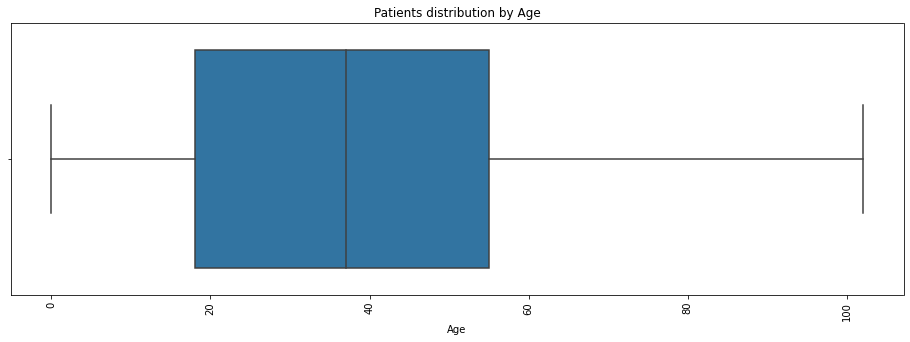

In [ ]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Age)
dist_age.set_title("Patients distribution by Age")
plt.show()

In [ ]:
# delete patients that are over 102
df = df.drop(df[df.Age > 102].index)



# delete the patients that are negative
df = df.drop(df[df.Age < 0].index)

**Exploratory Data Analysis**

 Overview of No-Show
 

In [ ]:
# check the total percentage of no show

pd.DataFrame(df.groupby('No-show')['PatientId'].count()).apply(lambda x : x / sum(x) * 100)

,PatientId
No-show,
False,79.808362
True,20.191638


In [ ]:
# check for duplicated rows
dups = df[df.duplicated() == True].count()

# check for duplicated patients
dups_id = df['PatientId'][df['PatientId'].duplicated() == True].count()

print('Duplicated rows: ', dups.sum())
print('Duplicated patient ids: ', dups_id)

Duplicated rows:  0
Duplicated patient ids:  48225


In [ ]:
# Scholarship
df['Scholarship'] = df['Scholarship'].apply(lambda x: True if x==1 else False)
# Hypertension
df['HyperTension'] = df['HyperTension'].apply(lambda x: True if x==1 else False)
# Diabetes
df['Diabetes'] = df['Diabetes'].apply(lambda x: True if x==1 else False)
# Handicap
df['Handicap'] = df['Handicap'].apply(lambda x: True if x==1 else False)
# Alcoholism
df['Alcoholism'] = df['Alcoholism'].apply(lambda x: True if x==1 else False)
# SMS_received
df['SMS_received'] = df['SMS_received'].apply(lambda x: True if x==1 else False)
# No_Show
df['No-show'] = df['No-show'].apply(lambda x: True if x=='Yes' else False)

In [ ]:
# create age groups using the distribution plotted in section 4
bins= [0,10,19,26,36,46,56,66,150]
labels = ['Less than 10','10-18','19-25','26-35','36-45','46-55','56-65','More than 65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.groupby(['AgeGroup'])['PatientId'].count()

AgeGroup
Less than 10    17475
10-18           11391
19-25            9733
26-35           14404
36-45           14582
46-55           15437
56-65           14203
More than 65    13296
Name: PatientId, dtype: int64

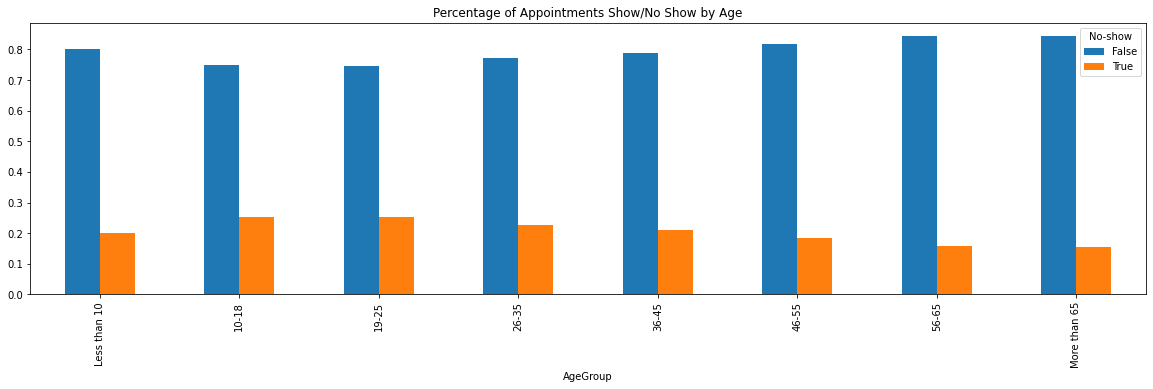

In [ ]:
# appointment attendance by age
age = df.groupby('AgeGroup')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
age.set_title("Percentage of Appointments Show/No Show by Age")
plt.show()

In [ ]:
df.isna()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,HyperTension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# table with the gender and the number of patient that missed or attended their appointment
gender_tbl = df.groupby(['Gender','No-show'])['PatientId'].count().reset_index()
gender_tbl

,Gender,No-show,PatientId
0,F,False,57243
1,F,True,14591
2,M,False,30962
3,M,True,7725


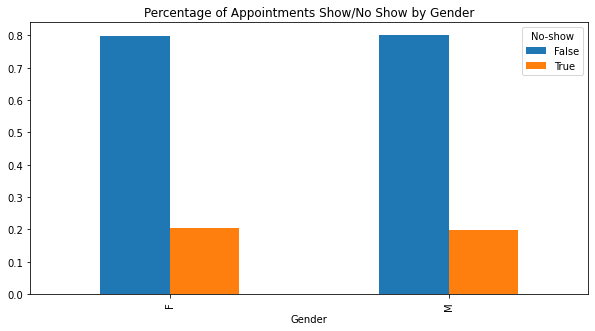

In [ ]:
# appointment attendance by gender
gender = df.groupby('Gender')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
gender.set_title("Percentage of Appointments Show/No Show by Gender")
plt.show()

**ScheduledDay**

looking at the time of the booking 

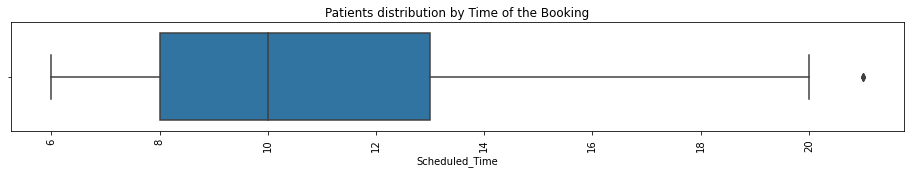

In [ ]:
# split ScheduledDay to get the time of the booking stored in Scheduled_Time
df['Scheduled_Time'] = pd.to_datetime(df['ScheduledDay']).dt.hour

# Look at the distribution of Scheduled_Time
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Scheduled_Time)
dist_age.set_title("Patients distribution by Time of the Booking")
plt.show()

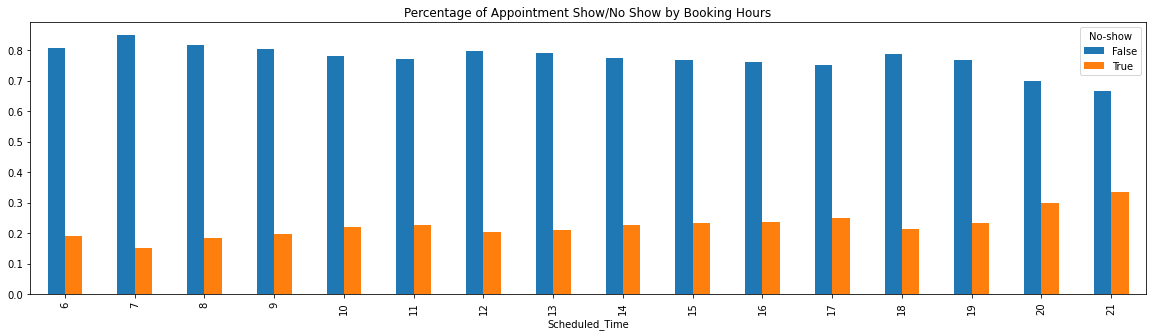

In [ ]:
# barchart showing percentage of show/ no-show by hours
appt_h = df.groupby('Scheduled_Time')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
appt_h.set_title("Percentage of Appointment Show/No Show by Booking Hours")
plt.show()

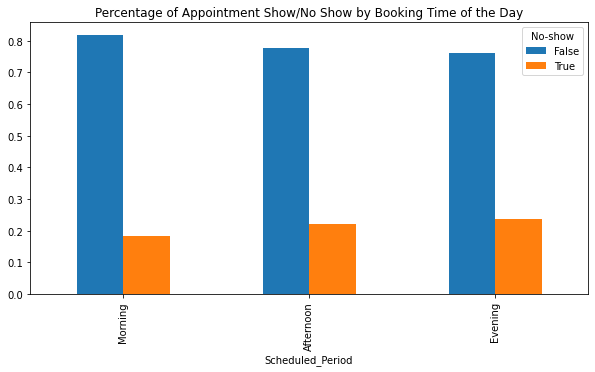

In [ ]:
# create three groupes for morning, afternoon and evening appointments
bins= [6,11,17,22]
labels = ['Morning','Afternoon','Evening']
df['Scheduled_Period'] = pd.cut(df['Scheduled_Time'], bins=bins, labels=labels, right=False)

# barchart showing percentage of show/ no-show by time of the day
appt_tod = df.groupby('Scheduled_Period')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
appt_tod.set_title("Percentage of Appointment Show/No Show by Booking Time of the Day")
plt.show()


Looking at the day of the Booking

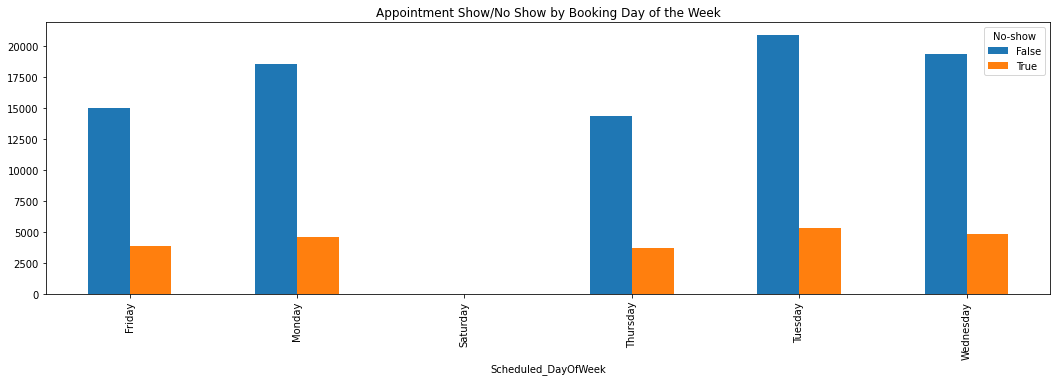

In [ ]:
# split ScheduledDay into days of the week
df['Scheduled_DayOfWeek'] = pd.to_datetime(df['ScheduledDay']).dt.day_name()

# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Scheduled_DayOfWeek')['No-show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Appointment Show/No Show by Booking Day of the Week")
plt.show()

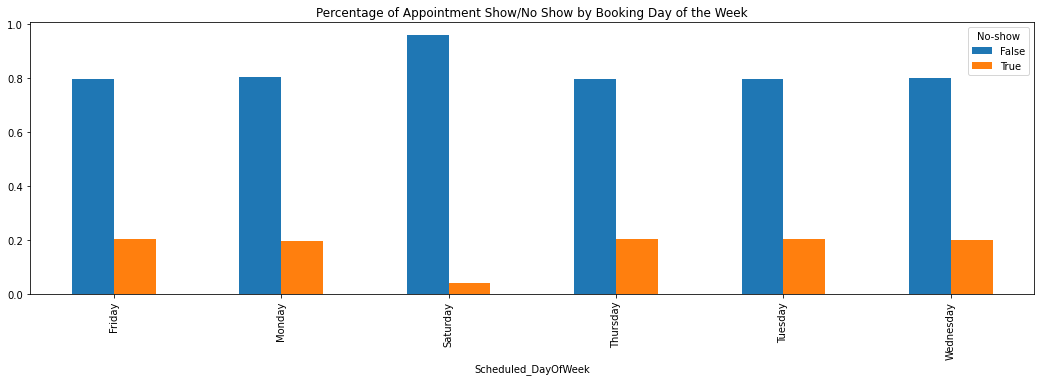

In [ ]:
# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Scheduled_DayOfWeek')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Percentage of Appointment Show/No Show by Booking Day of the Week")
plt.show()

Appointment Date

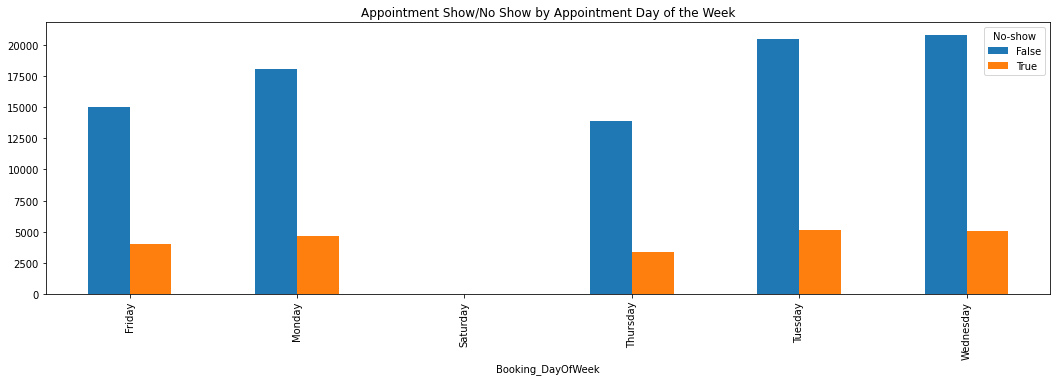

In [ ]:
# split ScheduledDay into days of the week
df['Booking_DayOfWeek'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Booking_DayOfWeek')['No-show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Appointment Show/No Show by Appointment Day of the Week")
plt.show()

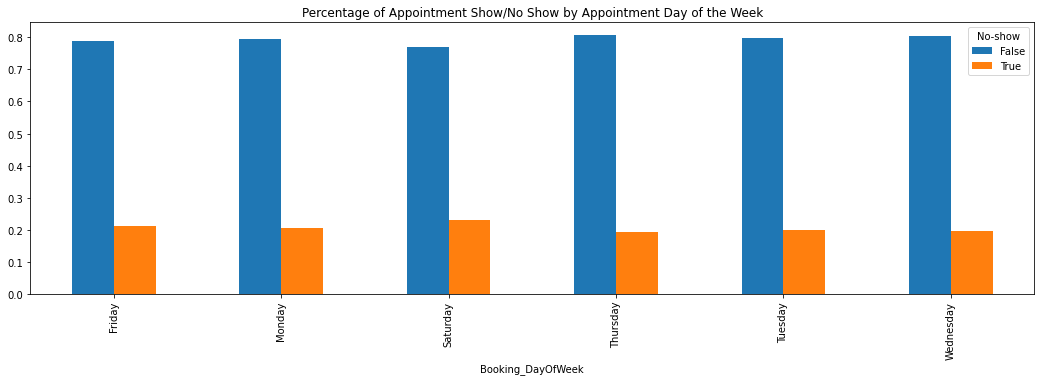

In [ ]:
# barchart showing number of show/ no-show by day of the week
day_of_week = df.groupby('Booking_DayOfWeek')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Percentage of Appointment Show/No Show by Appointment Day of the Week")
plt.show()

Waiting Time Between Booking and Medical Appointment

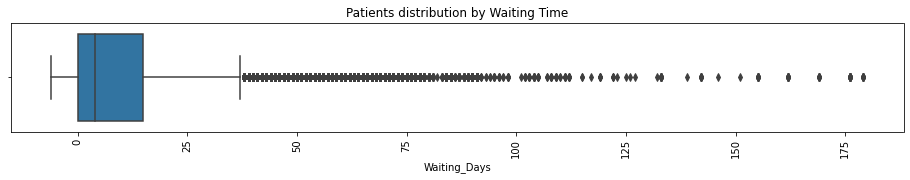

In [ ]:
# calculate the number of days the booking has been taken before the appointmenet
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

df['Waiting_Days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Look at the distribution of Waiting_Days
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Waiting_Days)
dist_age.set_title("Patients distribution by Waiting Time")
plt.show()


In [ ]:
# create pre-appointment period groups using the distribution above
bins= [0,1,7,14,21,28,35,200]
labels = ['Same day','Less than a week','A week','Two weeks','Three weeks','A month','More than a month']
df['Pre_Appt_Period'] = pd.cut(df['Waiting_Days'], bins=bins, labels=labels, right=False)
# replace missing and erronous values with unknown
df['Pre_Appt_Period'] = df['Pre_Appt_Period'].cat.add_categories('unknown').fillna('unknown')

df.groupby(['Pre_Appt_Period'])['PatientId'].count()

Pre_Appt_Period
Same day             38561
Less than a week     27277
A week               14018
Two weeks             9925
Three weeks           6859
A month               6229
More than a month     7647
unknown                  5
Name: PatientId, dtype: int64

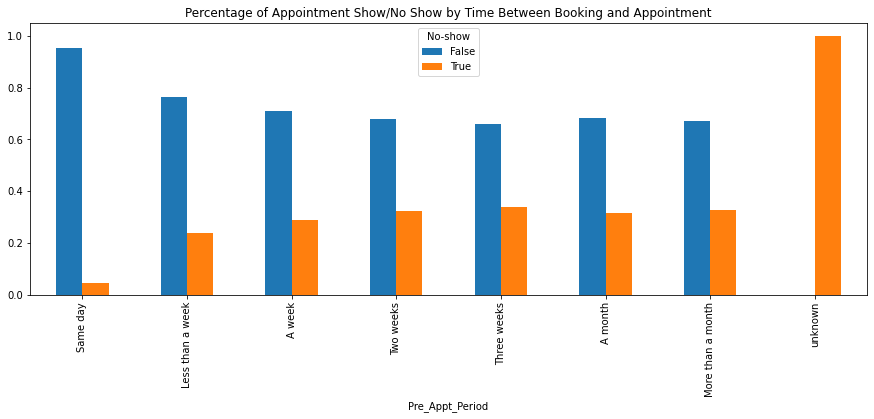

In [ ]:
# barchart showing number of show/ no-show in percentage by the amount of time between booking and appointment
psla = df.groupby('Pre_Appt_Period')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,5))
psla.set_title("Percentage of Appointment Show/No Show by Time Between Booking and Appointment")
plt.show()


Neighbourhood

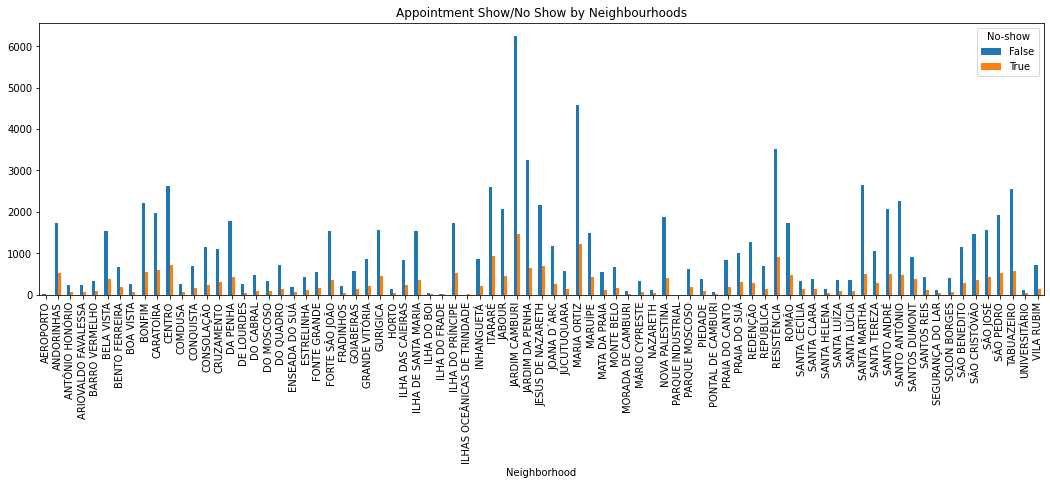

In [ ]:
# barchart showing number of show/ no-show by Neighbourhoods
day_of_week = df.groupby('Neighborhood')['No-show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Appointment Show/No Show by Neighbourhoods")
plt.show()

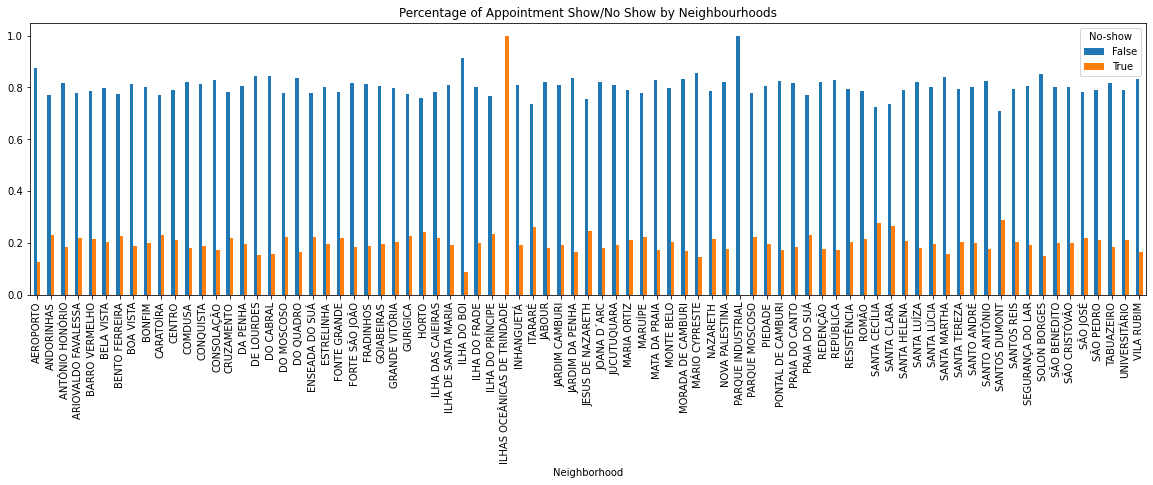

In [ ]:
# barchart showing percentage of show/ no-show by Neighbourhoods
day_of_week = df.groupby('Neighborhood')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
day_of_week.set_title("Percentage of Appointment Show/No Show by Neighbourhoods")
plt.show()

Scholarship

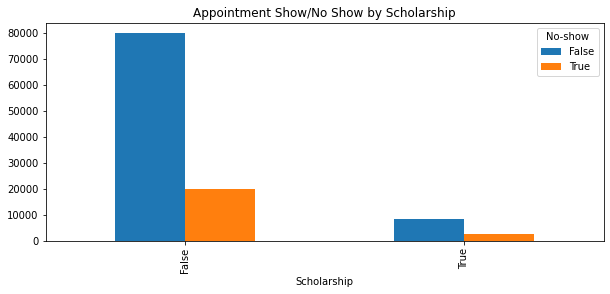

In [ ]:
# barchart showing number of show/ no-show by Scholarship
day_of_week = df.groupby('Scholarship')['No-show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Scholarship")
plt.show()

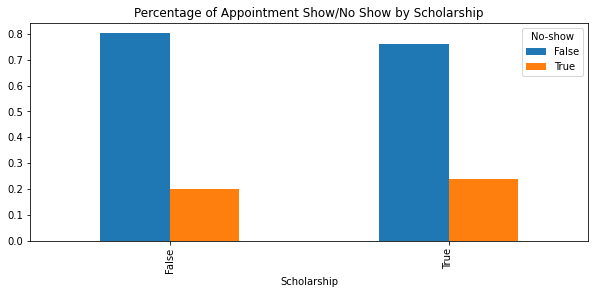

In [ ]:
# barchart showing the percentage of show/ no-show by Scholarship
day_of_week = df.groupby('Scholarship')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Scholarship")
plt.show()

HyperTension

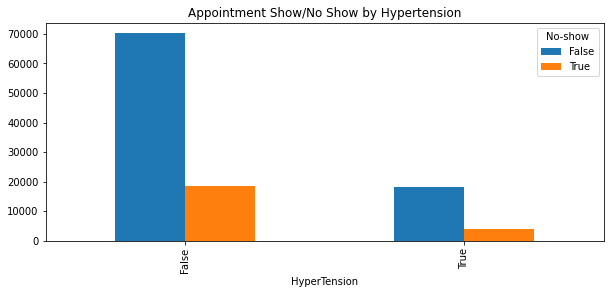

In [ ]:
# barchart showing number of show/ no-show by Hypertension
day_of_week = df.groupby('HyperTension')['No-show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Hypertension")
plt.show()

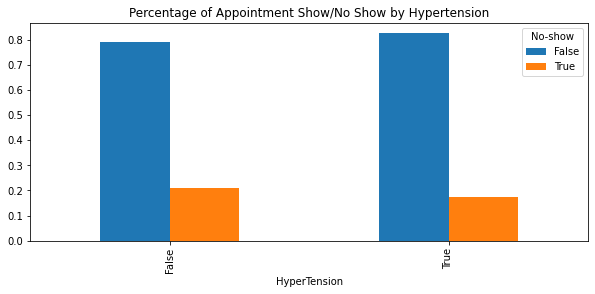

In [ ]:
# barchart showing the percentage of show/ no-show by Hypertension
day_of_week = df.groupby('HyperTension')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Hypertension")
plt.show()

Diabetes

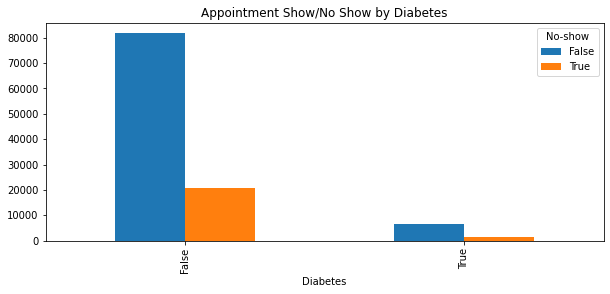

In [ ]:
# barchart showing number of show/ no-show by Diabetes
day_of_week = df.groupby('Diabetes')['No-show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Diabetes")
plt.show()

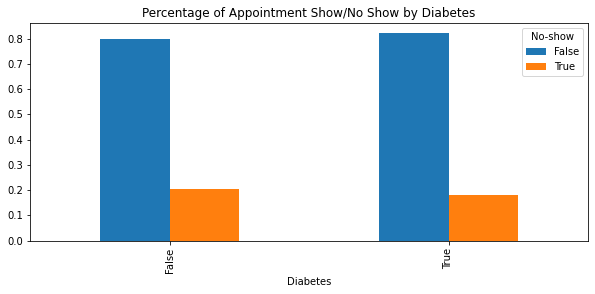

In [ ]:
# barchart showing the percentage of show/ no-show by Diabetes
day_of_week = df.groupby('Diabetes')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Diabetes")
plt.show()

Alcoholism

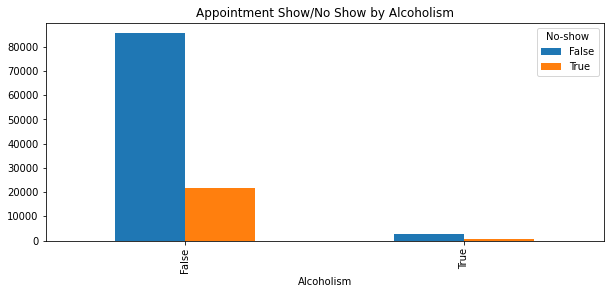

In [ ]:
# barchart showing number of show/ no-show by Alcoholism
day_of_week = df.groupby('Alcoholism')['No-show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Alcoholism")
plt.show()

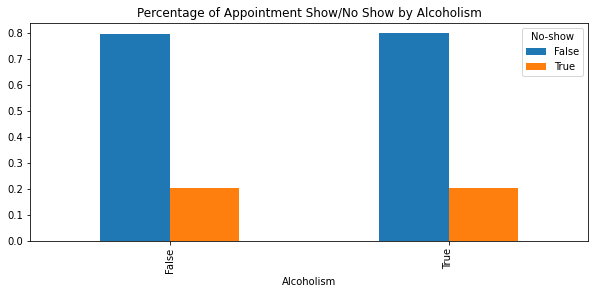

In [ ]:
# barchart showing the percentage of show/ no-show by Alcoholism
day_of_week = df.groupby('Alcoholism')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Alcoholism")
plt.show()

Handicap

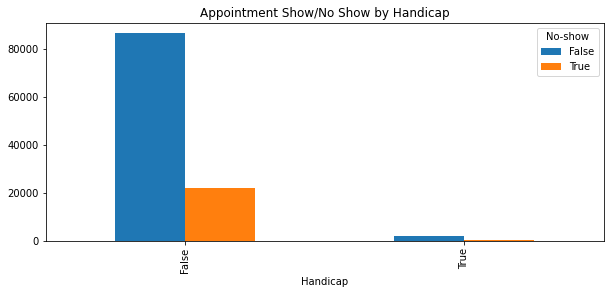

In [ ]:
# barchart showing number of show/ no-show by Alcoholism
day_of_week = df.groupby('Handicap')['No-show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by Handicap")
plt.show()

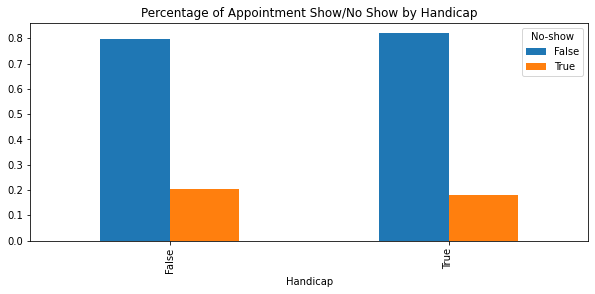

In [ ]:
# barchart showing the percentage of show/ no-show by Alcoholism
day_of_week = df.groupby('Handicap')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Handicap")
plt.show()

SMS Received

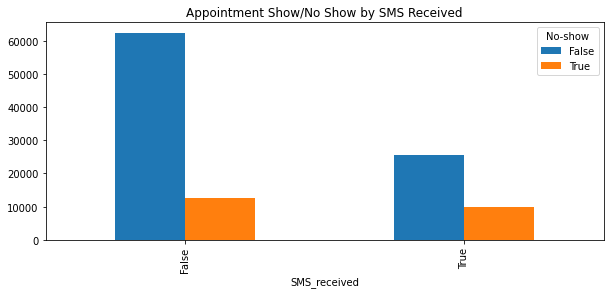

In [ ]:
# barchart showing number of show/ no-show by SMS Received
day_of_week = df.groupby('SMS_received')['No-show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Appointment Show/No Show by SMS Received")
plt.show()

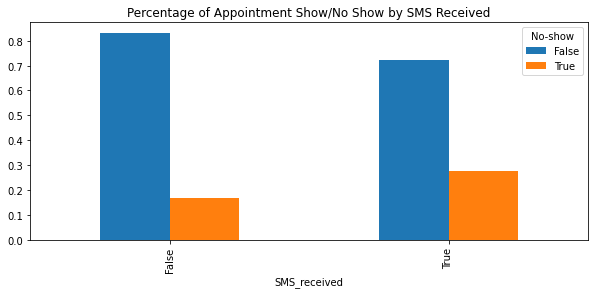

In [ ]:
# barchart showing the percentage of show/ no-show by SMS Received
day_of_week = df.groupby('SMS_received')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by SMS Received")
plt.show()